## Import

In [57]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import collections
import pprint

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import core.signal_processing as sigp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generate signal

In [2]:
prices = sigp.get_gaussian_walk(0, .01, 4*252, seed=20)

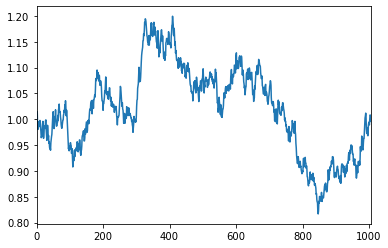

In [3]:
prices.plot()

In [4]:
rets = (np.log(prices) - np.log(prices.shift(1))).dropna()

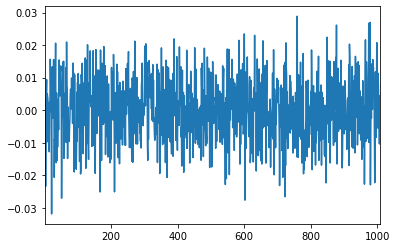

In [5]:
rets.plot()

In [6]:
# Data for example
x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)

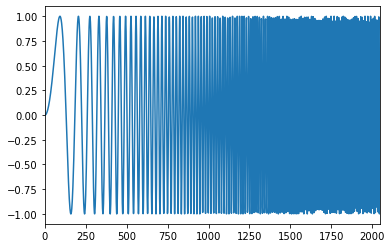

In [7]:
pd.Series(chirp_signal).plot()

# Time domain tools

/Users/saggese/.conda/envs/p1_develop/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


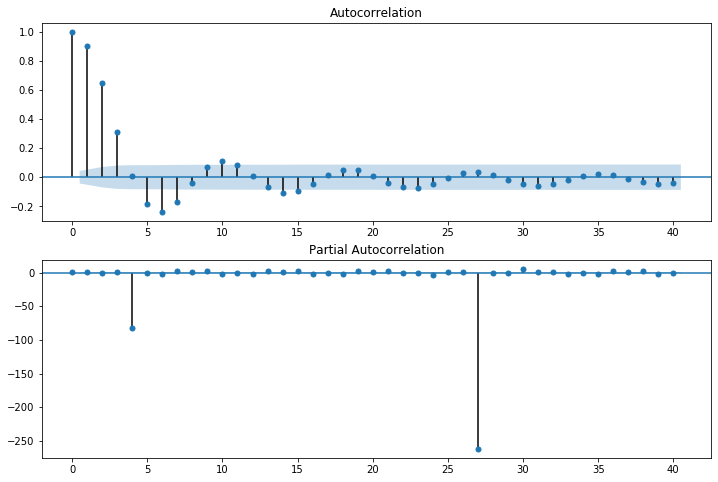

In [8]:
sigp.plot_autocorrelation(chirp_signal)

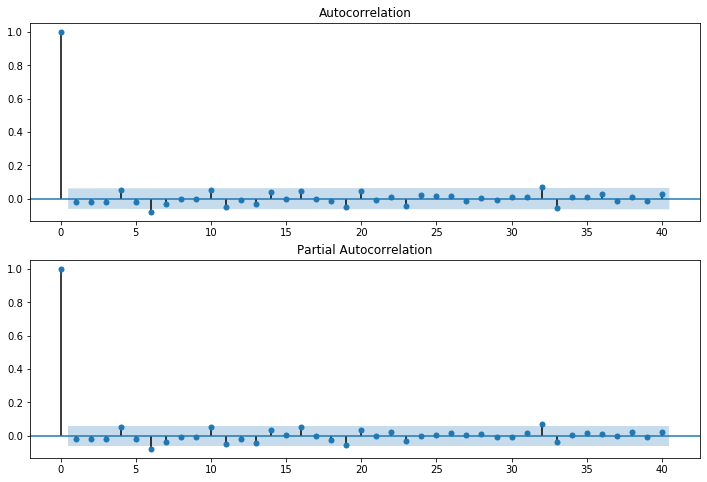

In [9]:
sigp.plot_autocorrelation(rets)

# Frequency domain tools

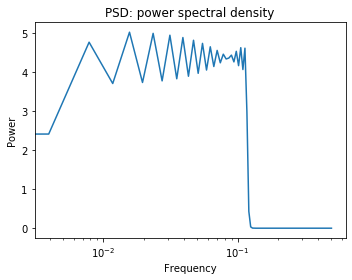

In [10]:
sigp.plot_power_spectral_density(chirp_signal)

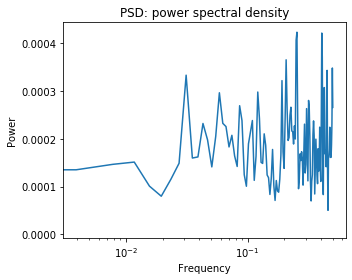

In [11]:
sigp.plot_power_spectral_density(rets)

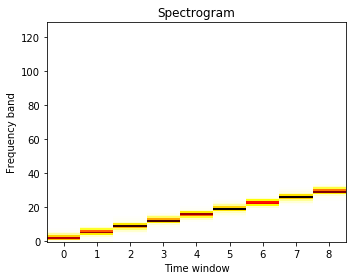

In [12]:
sigp.plot_spectrogram(chirp_signal)

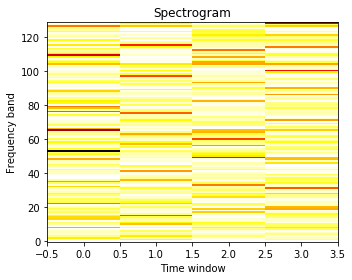

In [13]:
sigp.plot_spectrogram(rets)

# Multiresolution analysis tools

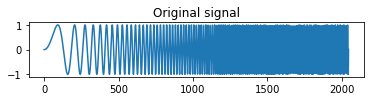

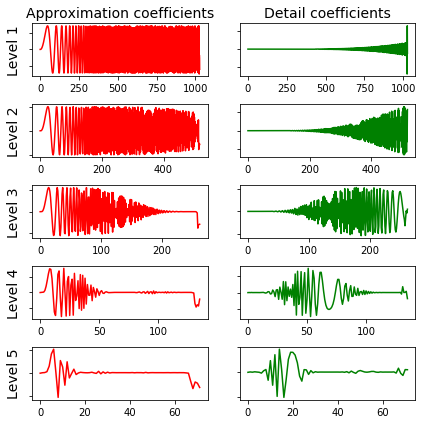

In [14]:
sigp.plot_wavelet_levels(chirp_signal, 'sym5', 5)

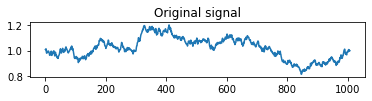

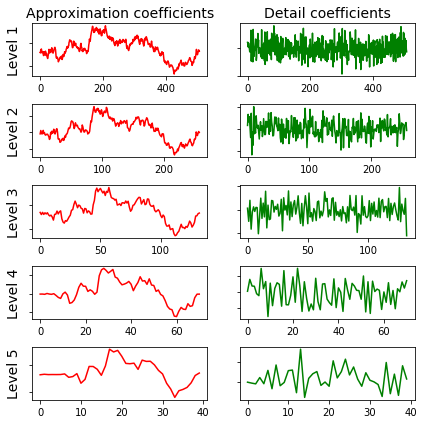

In [15]:
sigp.plot_wavelet_levels(prices, 'db5', 5)

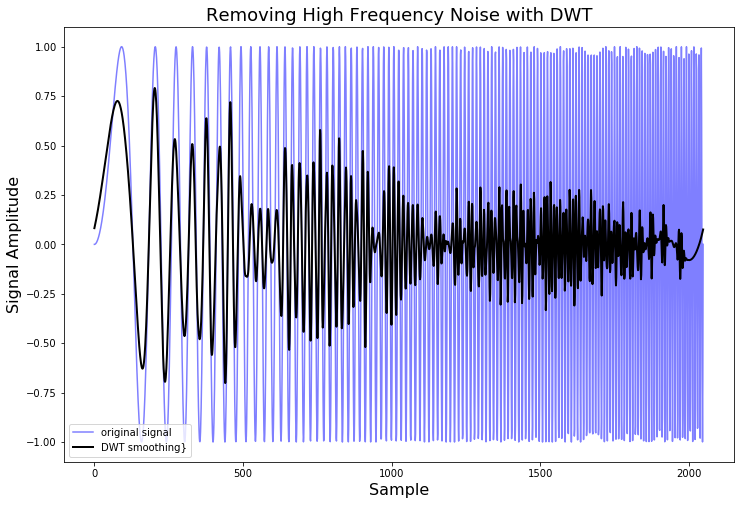

In [16]:
sigp.plot_low_pass(pd.Series(chirp_signal), 'db8', 2)

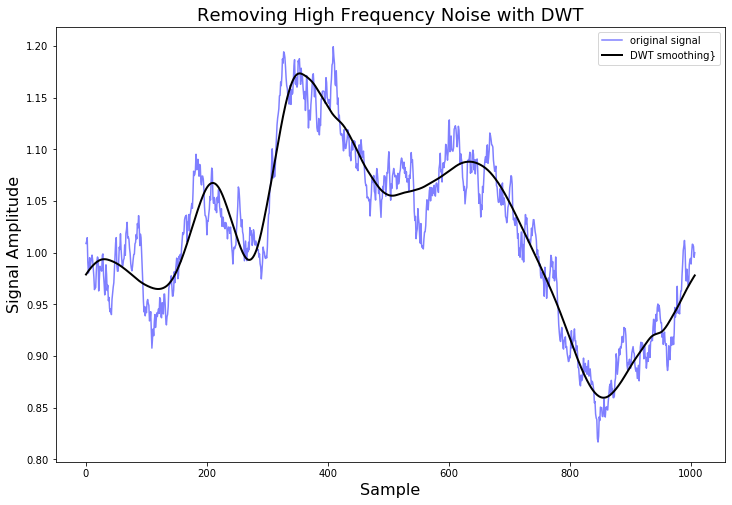

In [17]:
sigp.plot_low_pass(prices, 'db8', 1)

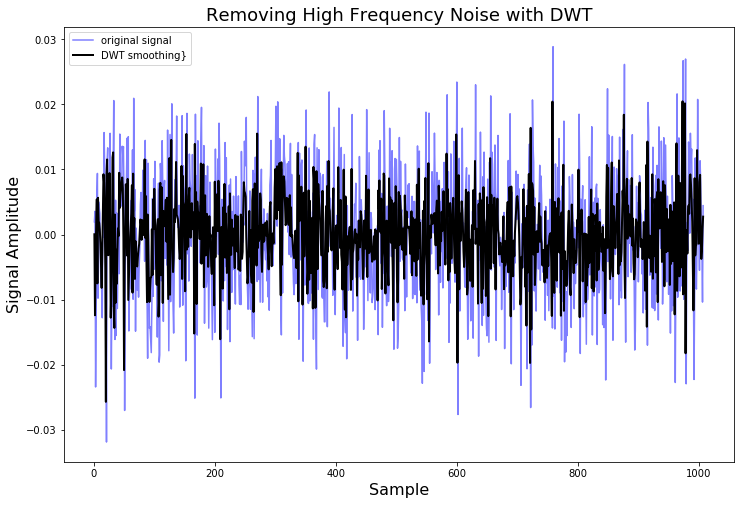

In [18]:
sigp.plot_low_pass(rets, 'db8', 0.2)

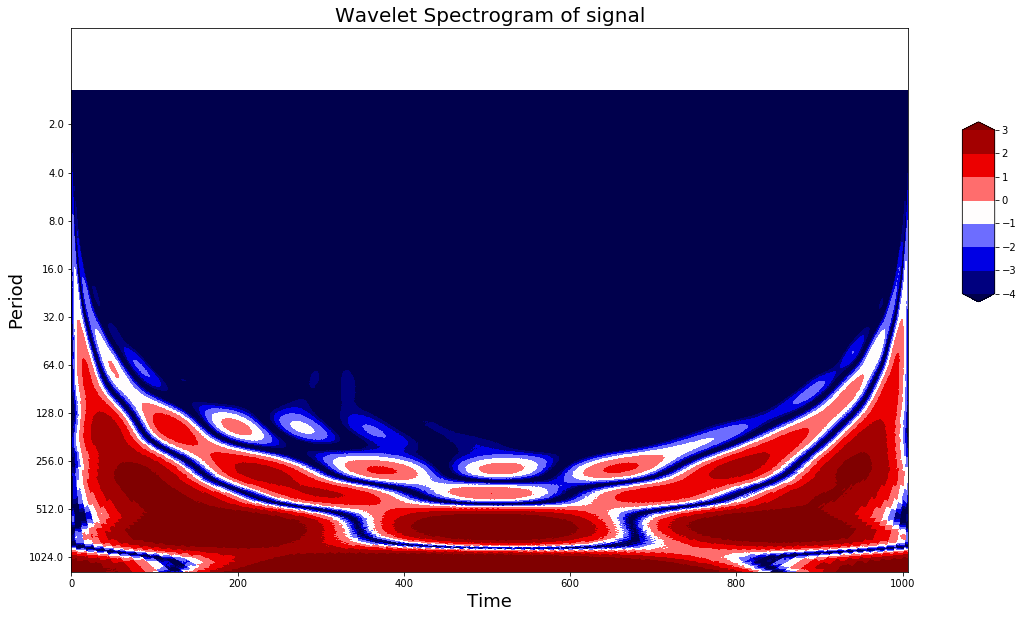

In [19]:
sigp.plot_scaleogram(prices, np.arange(1, 1024), 'morl')

# EMAs

In [20]:
impulse = sigp.get_impulse(-252, 3*252, tick=1)

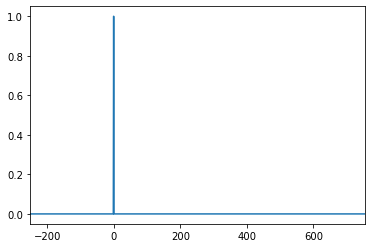

In [21]:
impulse.plot()

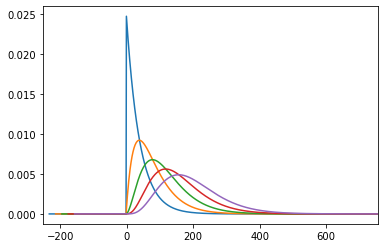

In [22]:
for i in range(1, 6):
    sigp.ema(impulse, tau=40, min_periods=20, depth=i).plot()

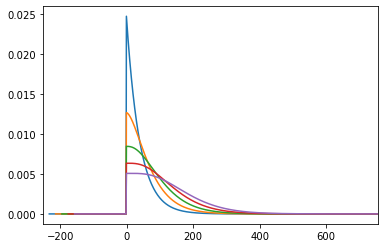

In [23]:
for i in range(1, 6):
    sigp.smooth_moving_average(impulse, tau=40, min_periods=20,
                               min_depth=1, max_depth=i).plot()

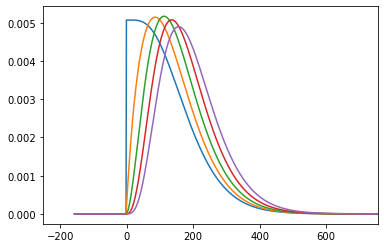

In [24]:
for i in range(1, 6):
    sigp.smooth_moving_average(impulse, tau=40, min_periods=20,
                               min_depth=i, max_depth=5).plot()

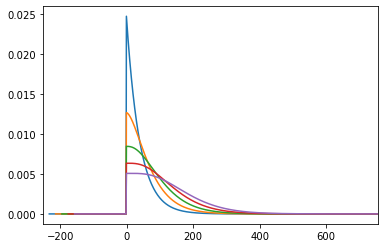

In [25]:
for i in range(1, 6):
    sigp.rolling_norm(impulse, tau=40, min_periods=20,
                      min_depth=1, max_depth=i, p_moment=1).plot()

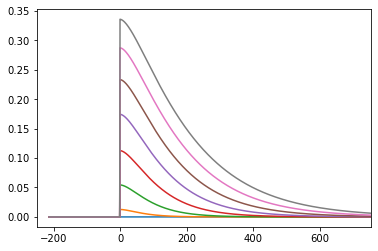

In [26]:
for i in np.arange(0.5, 4.5, 0.5):
    sigp.rolling_norm(impulse, tau=40, min_periods=20,
                      min_depth=1, max_depth=2, p_moment=i).plot()

# Outliers handling

[-1.74976547  0.3426804   1.1530358  -0.25243604  0.98132079]


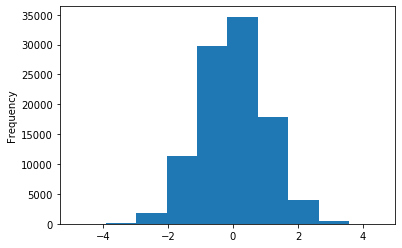

In [54]:
np.random.seed(100)
n = 100000
data = np.random.normal(loc=0.0, scale=1.0, size=n)
print(data[:5])

srs = pd.Series(data)
srs.plot(kind="hist")

In [66]:
def _analyze(srs):
    print(np.isnan(srs).sum())
    srs.plot(kind="hist")
    plt.show()
    pprint.pprint(stats)

0


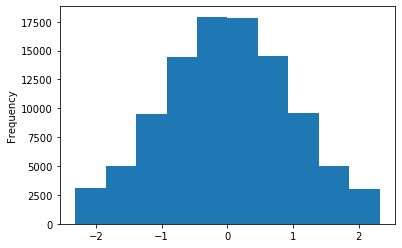

OrderedDict([('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.01, 0.99)),
             ('mode', 'winsorize'),
             ('num_elems_removed', 2000),
             ('num_elems_after', 98000),
             ('percentage_removed', 2.0),
             ('num_nans_after', 0),
             ('num_infs_after', 0)])


In [69]:
mode = "winsorize"
lower_quantile = 0.01
stats = collections.OrderedDict()
srs_out = sigp.process_outliers(srs, mode, lower_quantile, stats=stats)
#
_analyze(srs_out)

0


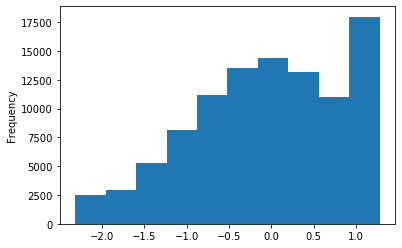

OrderedDict([('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.01, 0.9)),
             ('mode', 'winsorize'),
             ('bounds', array([-2.31604795,  1.27736845])),
             ('num_elems_removed', 11000),
             ('num_elems_after', 89000),
             ('percentage_removed', 11.0),
             ('num_nans_after', 0),
             ('num_infs_after', 0)])


In [80]:
mode = "winsorize"
lower_quantile = 0.01
upper_quantile = 0.90
stats = collections.OrderedDict()
srs_out = sigp.process_outliers(srs, mode, lower_quantile, upper_quantile=upper_quantile, stats=stats)
#
_analyze(srs_out)

2000


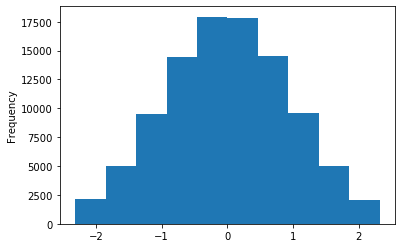

OrderedDict([('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.01, 0.99)),
             ('mode', 'set_to_nan'),
             ('num_elems_removed', 2000),
             ('num_elems_after', 98000),
             ('percentage_removed', 2.0),
             ('num_nans_after', 2000),
             ('num_infs_after', 0)])


In [71]:
mode = "set_to_nan"
lower_quantile = 0.01
stats = collections.OrderedDict()
srs_out = sigp.process_outliers(srs, mode, lower_quantile, stats=stats)
#
_analyze(srs_out)

0


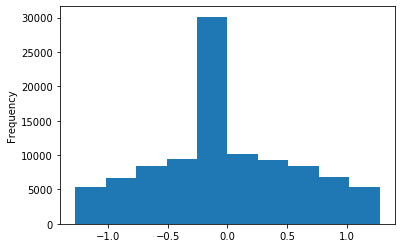

OrderedDict([('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.1, 0.9)),
             ('mode', 'set_to_zero'),
             ('num_elems_removed', 20000),
             ('num_elems_after', 80000),
             ('percentage_removed', 20.0),
             ('num_nans_after', 0),
             ('num_infs_after', 0)])


In [73]:
mode = "set_to_zero"
lower_quantile = 0.10
stats = collections.OrderedDict()
srs_out = sigp.process_outliers(srs, mode, lower_quantile, stats=stats)
#
_analyze(srs_out)